In [188]:
import pandas as pd
import numpy as np
from random import *
from pandas import *
import matplotlib.pyplot as plt

%matplotlib inline

In [189]:
herp = pd.read_csv(r"C:\Users\dustin\Desktop\Wx v HERP Permutation Testing\HERP AsIs Clean Data CSV.csv", header=1)
herp.head()

,ProjectID,LocationID,Address,MobileSN,ClientFirst,ClientLast,City,Census City,AKWarmRaterName,Rater_Name,...,Unnamed: 225,Unnamed: 226,Unnamed: 227,Unnamed: 228,Unnamed: 229,Unnamed: 230,Unnamed: 231,Unnamed: 232,Unnamed: 233,Unnamed: 234
0,40613,51686,Lt52GrandrossGrove S/DU#1,NaN,Angus,Isaac,ANCHOR POINT,Anchor Point CDP,Steven R Wisdom,Steven Wisdom,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,40614,51687,Lt52GrandrossGrove S/DU#2,NaN,Angus,Isaac,ANCHOR POINT,Anchor Point CDP,Steven R Wisdom,Steven Wisdom,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,144353,120612,4620 REKA DR UNIT B2,NaN,Jane,Conard,ANCHORAGE,Anchorage municipality,John Collette,John Collette,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,145334,120310,4786 MILLS DR,NaN,Lonnie,Burgener,ANCHORAGE,Anchorage municipality,Brendan Bonnett,Brendan Bonnett,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,147249,87642,7068 WEIMER RD UNIT 2-4,NaN,Autumn Dawn,Smith,ANCHORAGE,Anchorage municipality,Ted Veal,Ted Veal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [190]:
list(herp.columns.values)

['ProjectID',
 'LocationID',
 'Address',
 'MobileSN',
 'ClientFirst',
 'ClientLast',
 'City',
 'Census City',
 'AKWarmRaterName',
 'Rater_Name',
 'FileName',
 'RatingType',
 'RatingPoints',
 'RatingStars',
 'Rating_Date',
 'OccupancyType',
 'Occupants',
 'HouseType',
 'Bedrooms',
 'LivingUnits',
 'Actual Living Units',
 'UnitLocation',
 'Electric_Utility',
 'Gas_Utility',
 'Ceiling Height',
 'YearBuilt',
 'WinWallRatio',
 'FloorExpression',
 "FloorArea (Don't Use)",
 'GarageSize',
 "EnergyCost (Don't Use)",
 "ElectricCost (Don't Use)",
 "FuelCost (Don't Use)",
 'Birch_MMBTU',
 'Coal_MMBTU',
 'Electric_MMBTU',
 'Gas_MMBTU',
 'Oil1_MMBTU',
 'Oil2_MMBTU',
 'Propane_MMBTU',
 'Spruce_MMBTU',
 'CFM50',
 'ENACH (ACH50)',
 'ENBlowerTestOrEst',
 'VolExpression',
 'Volume',
 'DryerFuel',
 'RangeFuel',
 'OtherUse',
 'SouthWindowArea',
 'UseItemizedLightsAndAppliances',
 'VentType',
 'CITY',
 'SOURCEADDRESSLINE1',
 'CityName',
 'Updated ARIS ANCSARegionId',
 'Updated AuditorRegionId',
 'New ANCSA 

In [191]:
herp =  herp[['ProjectID','Census City','LocationID', 'RatingType', 'Address','RatingPoints', 'RatingStars','HouseType', 'YearBuilt',
              'Redone Floor Expression','New ANCSA RegionName','Total Energy','Space Heat MMBTU','DHW MMBTU',
              'Appliance/Lights MMBTU']]
herp.head()

,ProjectID,Census City,LocationID,RatingType,Address,RatingPoints,RatingStars,HouseType,YearBuilt,Redone Floor Expression,New ANCSA RegionName,Total Energy,Space Heat MMBTU,DHW MMBTU,Appliance/Lights MMBTU
0,40613,Anchor Point CDP,51686,As_Is,Lt52GrandrossGrove S/DU#1,54.3,2,Multi_Family_One_Unit,1984,400,Cook Inlet Regional (CIRI),43.8,12.8,13.0,18.0
1,40614,Anchor Point CDP,51687,As_Is,Lt52GrandrossGrove S/DU#2,54.3,2,Multi_Family_One_Unit,1984,400,Cook Inlet Regional (CIRI),43.8,12.8,13.0,18.0
2,144353,Anchorage municipality,120612,As_Is,4620 REKA DR UNIT B2,58.3,2,Multi_Family_One_Unit,1978,796,Cook Inlet Regional (CIRI),110.6,65.1,29.1,16.4
3,145334,Anchorage municipality,120310,As_Is,4786 MILLS DR,59.5,2,Multi_Family_One_Unit,1981,586,Cook Inlet Regional (CIRI),139.2,95.6,24.6,19.0
4,147249,Anchorage municipality,87642,As_Is,7068 WEIMER RD UNIT 2-4,15.1,1,Multi_Family_One_Unit,1976,753,Cook Inlet Regional (CIRI),83.4,50.9,12.6,19.9


In [192]:
herp = herp.rename(columns = {
        'Space Heat MMBTU':'Space_Heat_MMBTU',
        'Redone Floor Expression':'FloorArea',
        'Census City':'City'
    })
herp.head()

,ProjectID,City,LocationID,RatingType,Address,RatingPoints,RatingStars,HouseType,YearBuilt,FloorArea,New ANCSA RegionName,Total Energy,Space_Heat_MMBTU,DHW MMBTU,Appliance/Lights MMBTU
0,40613,Anchor Point CDP,51686,As_Is,Lt52GrandrossGrove S/DU#1,54.3,2,Multi_Family_One_Unit,1984,400,Cook Inlet Regional (CIRI),43.8,12.8,13.0,18.0
1,40614,Anchor Point CDP,51687,As_Is,Lt52GrandrossGrove S/DU#2,54.3,2,Multi_Family_One_Unit,1984,400,Cook Inlet Regional (CIRI),43.8,12.8,13.0,18.0
2,144353,Anchorage municipality,120612,As_Is,4620 REKA DR UNIT B2,58.3,2,Multi_Family_One_Unit,1978,796,Cook Inlet Regional (CIRI),110.6,65.1,29.1,16.4
3,145334,Anchorage municipality,120310,As_Is,4786 MILLS DR,59.5,2,Multi_Family_One_Unit,1981,586,Cook Inlet Regional (CIRI),139.2,95.6,24.6,19.0
4,147249,Anchorage municipality,87642,As_Is,7068 WEIMER RD UNIT 2-4,15.1,1,Multi_Family_One_Unit,1976,753,Cook Inlet Regional (CIRI),83.4,50.9,12.6,19.9


In [193]:
herp = herp.query("HouseType == 'Single_Family'")
herp = herp.query("City == 'Anchorage municipality'")

In [194]:
herp['FloorArea'] = herp['FloorArea'].str.replace(",","")
herp['FloorArea'] = herp['FloorArea'].astype(float)
herp.dtypes

ProjectID                 float64
City                       object
LocationID                float64
RatingType                 object
Address                    object
RatingPoints              float64
RatingStars               float64
HouseType                  object
YearBuilt                 float64
FloorArea                 float64
New ANCSA RegionName       object
Total Energy               object
Space_Heat_MMBTU          float64
DHW MMBTU                 float64
Appliance/Lights MMBTU    float64
dtype: object

In [195]:
herp['kbtu_heat_per_sf'] = herp.Space_Heat_MMBTU / herp.FloorArea * 1000
herp.head()

,ProjectID,City,LocationID,RatingType,Address,RatingPoints,RatingStars,HouseType,YearBuilt,FloorArea,New ANCSA RegionName,Total Energy,Space_Heat_MMBTU,DHW MMBTU,Appliance/Lights MMBTU,kbtu_heat_per_sf
228,46796,Anchorage municipality,17581,As_Is,10281 JAMESTOWN DR UNIT 801,73.4,3.5,Single_Family,1983,547,Cook Inlet Regional (CIRI),97.6,60.7,18.1,18.8,110.968921
292,98080,Anchorage municipality,6429,As_Is,3250 SEAWIND DR,67.9,2.5,Single_Family,1978,2545,Cook Inlet Regional (CIRI),420.9,351.0,37.7,32.2,137.917485
296,66107,Anchorage municipality,35742,As_Is,1925 ALDER DR,0.0,1.0,Single_Family,1952,1034,Cook Inlet Regional (CIRI),506.2,458.8,26.0,21.4,443.713733
304,98318,Anchorage municipality,9336,As_Is,9260 BUDDY WERNER DR,56.2,2.0,Single_Family,1972,2110,Cook Inlet Regional (CIRI),312.8,242.7,40.2,29.9,115.023697
305,51253,Anchorage municipality,21048,As_Is,2624 JUNEAU ST,14.3,1.0,Single_Family,1959,2677,Cook Inlet Regional (CIRI),661.3,590.7,40.2,30.4,220.657452


In [196]:
wx = pd.read_csv(r"C:\Users\dustin\Desktop\Wx v HERP Permutation Testing\Wx AsIs Clean Data CSV.csv", header=0)
list(wx.columns.values)

['ProjectID',
 'LocationID',
 'Address',
 'MobileSN',
 'ClientFirst',
 'ClientLast',
 'City',
 'Census City',
 'AKWarmRaterName',
 'Rater_Name',
 'FileName',
 'RatingType',
 'RatingPoints',
 'RatingStars',
 'Rating_Date',
 'OccupancyType',
 'Occupants',
 'HouseType',
 'Bedrooms',
 'LivingUnits',
 'Actual Living Units',
 'UnitLocation',
 'Electric_Utility',
 'Gas_Utility',
 'Ceiling Height',
 'YearBuilt',
 'WinWallRatio',
 'FloorExpression',
 "FloorArea (Don't Use)",
 'GarageSize',
 'EnergyCost (Don\x92t Use)',
 " ElectricCost (Don't Use) ",
 " FuelCost (Don't Use) ",
 'Birch_MMBTU',
 'Coal_MMBTU',
 'Electric_MMBTU',
 'Gas_MMBTU',
 'Oil1_MMBTU',
 'Oil2_MMBTU',
 'Propane_MMBTU',
 'Spruce_MMBTU',
 'CFM50',
 'ENACH (ACH50)',
 'ENBlowerTestOrEst',
 'VolExpression',
 'Volume',
 'DryerFuel',
 'RangeFuel',
 'OtherUse',
 'SouthWindowArea',
 'UseItemizedLightsAndAppliances',
 'VentType',
 'CITY',
 'SOURCEADDRESSLINE1',
 'CityName',
 'Updated ARIS ANCSARegionId',
 'Updated ARIS AuditorRegionId',


In [197]:
wx =  wx[['ProjectID','Census City','LocationID', 'RatingType', 'Address','RatingPoints', 'RatingStars',
          'HouseType', 'YearBuilt','Redone Floor Expression','NEW ANCSA RegionName','Total Energy',
          'Space Heat MMBTU','DHW MMBTU','Appliance/Lights MMBTU']]

In [198]:
wx = wx.rename(columns = {
        'Space Heat MMBTU':'Space_Heat_MMBTU',
        'Redone Floor Expression':'FloorArea',
        'Census City':'City'
    })
wx = wx.query("HouseType == 'Single_Family'")
wx = wx.query("City == 'Anchorage municipality'")
wx['FloorArea'] = wx['FloorArea'].str.replace(",","")
wx['FloorArea'] = wx['FloorArea'].astype(float)
wx['kbtu_heat_per_sf'] = wx.Space_Heat_MMBTU / wx.FloorArea * 1000
wx.head()

,ProjectID,City,LocationID,RatingType,Address,RatingPoints,RatingStars,HouseType,YearBuilt,FloorArea,NEW ANCSA RegionName,Total Energy,Space_Heat_MMBTU,DHW MMBTU,Appliance/Lights MMBTU,kbtu_heat_per_sf
1355,115539,Anchorage municipality,81692,Wx_As_Is,7667 STRAWBERRY COTTAGE WAY,51.6,2.0,Single_Family,2002,1290,Cook Inlet Regional (CIRI),323.4,264.2,32.4,26.8,204.806202
1375,100457,Anchorage municipality,76153,Wx_As_Is,NHN Stellar Jay Lane,25.6,1.0,Single_Family,1977,1732,Cook Inlet Regional (CIRI),543.2,500.1,14.0,29.2,288.741339
1404,138733,Anchorage municipality,119560,Wx_As_Is,2861 PROCUPINE TRAIL ROAD,39.5,1.0,Single_Family,1952,1320,Cook Inlet Regional (CIRI),405.8,352.7,27.5,25.6,267.196970
1439,100185,Anchorage municipality,76063,Wx_As_Is,132 N BLISS ST,11.1,1.0,Single_Family,1953,437,Cook Inlet Regional (CIRI),134.9,103.0,14.8,17.0,235.697941
1445,138598,Anchorage municipality,79449,Wx_As_Is,9611 NEWHAVEN LOOP,47.6,1.5,Single_Family,1984,1124,Cook Inlet Regional (CIRI),244.8,215.5,7.4,21.9,191.725979


In [199]:
wx_mean = wx['kbtu_heat_per_sf'].mean()
wx_mean

132.84878848221325

In [200]:
herp_mean = herp['kbtu_heat_per_sf'].mean()
herp_mean

124.77872689870458

In [201]:
efficiency_diff = wx_mean - herp_mean
numiterations = 10000
small_wx = wx[['RatingType', 'kbtu_heat_per_sf']]
small_herp = herp[['RatingType', 'kbtu_heat_per_sf']]
alldata = concat([small_wx, small_herp], ignore_index=True)
alldata.head()

,RatingType,kbtu_heat_per_sf
0,Wx_As_Is,204.806202
1,Wx_As_Is,288.741339
2,Wx_As_Is,267.196970
3,Wx_As_Is,235.697941
4,Wx_As_Is,191.725979


In [202]:
alldata.tail()

,RatingType,kbtu_heat_per_sf
15278,As_Is,108.323012
15279,As_Is,116.181670
15280,As_Is,102.431818
15281,As_Is,75.893648
15282,As_Is,128.117238


In [203]:
alldata.describe()

,kbtu_heat_per_sf
count,15283.000000
mean,124.998920
std,56.199645
min,26.522593
25%,88.561473
50%,113.454545
75%,145.917291
max,853.523238


In [204]:
small_wx.describe()

,kbtu_heat_per_sf
count,417.000000
mean,132.848788
std,46.690295
min,45.260417
25%,98.087432
50%,124.835821
75%,155.045872
max,357.968575


In [205]:
small_herp.describe()

,kbtu_heat_per_sf
count,14866.000000
mean,124.778727
std,56.428863
min,26.522593
25%,88.285986
50%,113.117621
75%,145.651209
max,853.523238


In [206]:
numiterations = 10000
all_groupsize = alldata['kbtu_heat_per_sf'].count()
wx_groupsize = small_wx['kbtu_heat_per_sf'].count()
herp_groupsize = small_herp['kbtu_heat_per_sf'].count()
chance_eff_difference = pd.Series(index=range(0,numiterations))
alldatashuffled = pd.DataFrame()

In [207]:
for i in range(0, numiterations):
    alldatashuffled['kbtu_heat_per_sf'] = np.random.permutation(alldata['kbtu_heat_per_sf'])
    wx_randomgroup = alldatashuffled.iloc[0:wx_groupsize]
    herp_randomgroup = alldatashuffled.iloc[wx_groupsize: all_groupsize]
    chance_eff_difference[i] = wx_randomgroup.mean() - herp_randomgroup.mean()
chance_eff_difference

0     1.614825
1     1.159202
2     0.831829
3    -0.736538
4     2.267745
5    -3.653633
6    -2.512614
7     1.025992
8    -1.234720
9     0.307861
10    0.554711
11    0.317130
12    3.656939
13   -0.677914
14    0.225234
...
9985   -0.059701
9986    1.211139
9987    0.710882
9988   -0.386805
9989    2.163329
9990    0.502876
9991   -2.170360
9992    4.624309
9993    4.006046
9994    2.927709
9995   -1.220390
9996   -2.004957
9997   -3.191878
9998   -4.004827
9999    3.195278
Length: 10000, dtype: float64

In [208]:
single_side_pvalue_bool = chance_eff_difference >= efficiency_diff
single_side_pvalue = float(single_side_pvalue_bool.sum()) / float(numiterations)
single_side_pvalue

0.0024

In [209]:
two_side_pvalue_bool = chance_eff_difference <= -efficiency_diff
two_side_pvalue = (float(two_side_pvalue_bool.sum()) + float(single_side_pvalue_bool.sum())) / float(numiterations)
two_side_pvalue

0.0034

In [210]:
right_tail = np.where(chance_eff_difference >= efficiency_diff, chance_eff_difference, 0)
right_tail = right_tail[np.nonzero(right_tail)]
left_tail = np.where(chance_eff_difference <= -efficiency_diff, chance_eff_difference, 0)
left_tail = left_tail[np.nonzero(left_tail)]
center = np.where(chance_eff_difference < efficiency_diff, chance_eff_difference, 0)
center = np.where(chance_eff_difference > -efficiency_diff, chance_eff_difference, 0)
center = center[np.nonzero(center)]

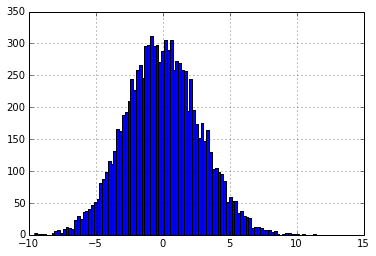

In [211]:
chance_eff_difference.hist(bins=100)

<function matplotlib.pyplot.show>

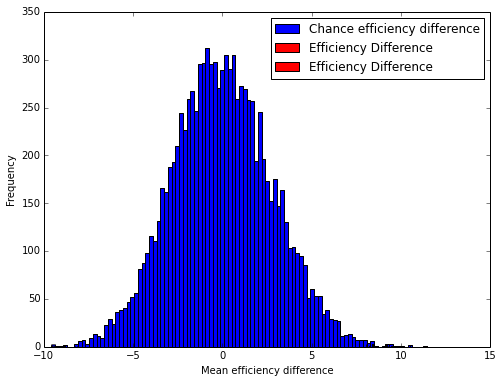

In [212]:
plt.figure(figsize=(8, 6), dpi=80)
plt.hist(chance_eff_difference, bins=100, color='b', label='Chance efficiency difference')
plt.hist(left_tail, bins=100, color='r', label='Efficiency Difference')
plt.hist(right_tail, bins=100, color='r', label='Efficiency Difference')
plt.legend()
plt.xlabel('Mean efficiency difference')
plt.ylabel('Frequency')
#conclusion = 'There is a %s percent chance of observing a height difference as extreme as the one actually measured', % two_side_pvalue*100)
#plt.title(conclusion)
plt.show